In [1]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
import cv2
import gc
import os
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
 
import warnings
warnings.filterwarnings('ignore')

In [4]:
!unzip /content/drive/MyDrive/lung_image_sets.zip

Streaming output truncated to the last 5000 lines.
  inflating: lung_image_sets/lung_aca/lungaca1906.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1907.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1908.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1909.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca191.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1910.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1911.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1912.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1913.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1914.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1915.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1916.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1917.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1918.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca1919.jpeg  
  inflating: lung_image_sets/lung_aca/lungaca192.jpeg  
  inflating: lung_image_sets/lung_aca/l

In [5]:
path = '/content/lung_image_sets'
classes = os.listdir(path)
classes

['lung_scc', 'lung_n', 'lung_aca']

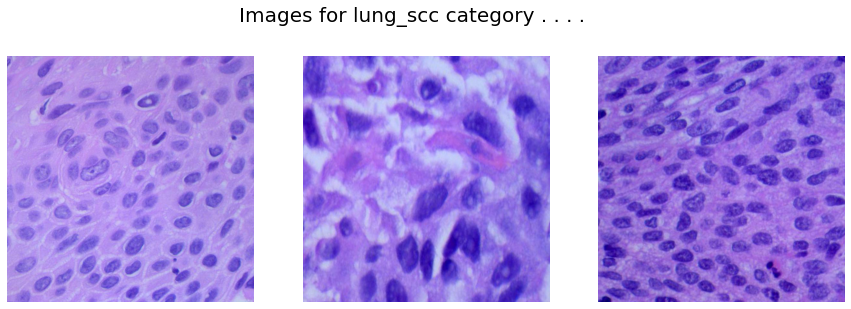

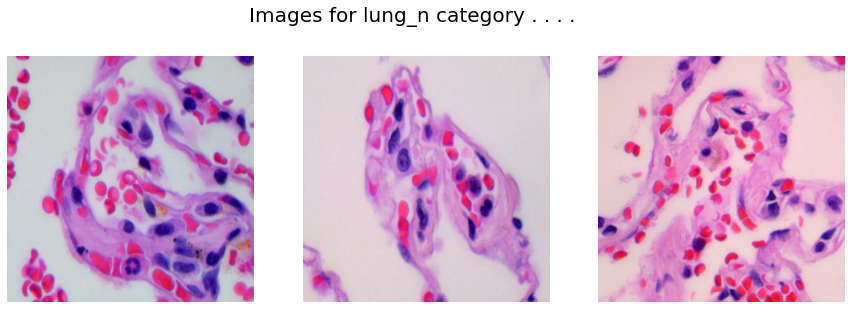

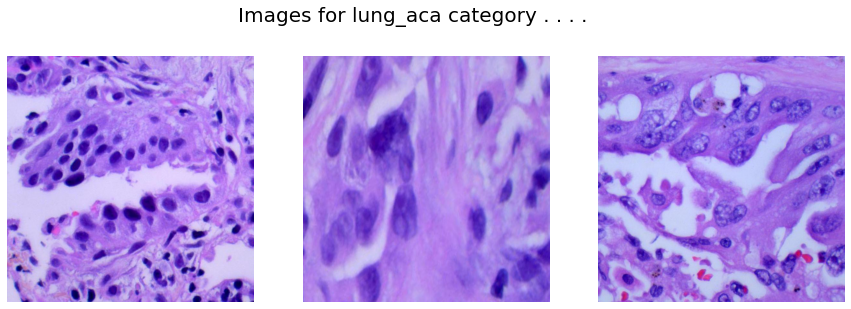

In [6]:
path = 'lung_image_sets'
 
for cat in classes:
    image_dir = f'{path}/{cat}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

In [7]:
IMG_SIZE = 128
SPLIT = 0.3
EPOCHS = 200
BATCH_SIZE = 16

In [8]:
X = []
Y = []
 
for i, cat in enumerate(classes):
  images = glob(f'{path}/{cat}/*.jpeg')
 
  for image in images:
    img = cv2.imread(image)
     
    X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
    Y.append(i)
 
X = np.asarray(X)
one_hot_encoded_Y = pd.get_dummies(Y).values

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, one_hot_encoded_Y,
                                                  test_size = SPLIT,
                                                  random_state = 2022)
print(X_train.shape, X_val.shape)

(4204, 128, 128, 3) (1802, 128, 128, 3)


In [61]:
Y_val.shape

()

In [10]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
        model = VGG19(include_top=False,input_shape=(128, 128, 3), weights='imagenet')
        transfer_layer = model.get_layer('block5_pool')
        conv_model = Model(inputs=model.input, outputs=transfer_layer.output)
        # Start a new Keras Sequential model.
        new_model = Sequential()

        # Add the convolutional part of the VGG16 model from above.
        new_model.add(conv_model)

        # Flatten the output of the VGG16 model because it is from a
        # convolutional layer.
        new_model.add(Flatten())

        # Add a dense (aka. fully-connected) layer.
        # This is for combining features that the VGG16 model has
        # recognized in the image.

        new_model.add(Dense(512, activation='relu'))


        # Add the final layer for the actual classification.
        new_model.add(Dense(3, activation='softmax'))
        
        model1 = InceptionV3(include_top=False,input_shape=(128, 128, 3), weights='imagenet')
        transfer_layer1 = model1.get_layer('mixed10')
        conv_model1 = Model(inputs=model1.input, outputs=transfer_layer1.output)
        new_model1 = Sequential()

        new_model1.add(conv_model1)

        new_model1.add(Flatten())

        #new_model1.add(Dropout(0.5))

        new_model1.add(Dense(512, activation='relu'))

        # Add the final layer for the actual classification.
        new_model1.add(Dense(3, activation='softmax'))
        
        
        
        
        model1 = DenseNet121(include_top=False,input_shape=(128, 128, 3), weights='imagenet')
        transfer_layer1 = model1.get_layer('bn')
        conv_model2 = Model(inputs=model1.input, outputs=transfer_layer1.output)
        new_model2 = Sequential()

        new_model2.add(conv_model1)

        new_model2.add(Flatten())

        #new_model1.add(Dropout(0.5))

        new_model2.add(Dense(512, activation='relu'))

        # Add the final layer for the actual classification.
        new_model2.add(Dense(3, activation='softmax'))
        
        inputs = keras.Input(shape=(128,128,3))
        
        outputs = layers.average([new_model(inputs),new_model1(inputs),new_model2(inputs)])
        ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

29084464/29084464 [==============================] - 0s 0us/step


In [12]:
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 3)            24220739    ['input_4[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 3)            25999139    ['input_4[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 3)            25999139    ['input_4[0][0]']          

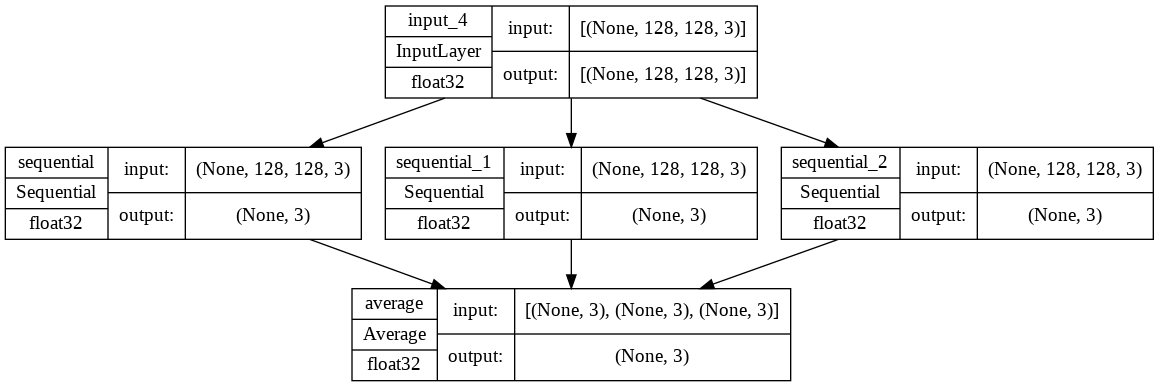

In [13]:
keras.utils.plot_model(
    ensemble_model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

In [14]:
ensemble_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.90:
            print('\n Validation accuracy has reached upto \
                      90% so, stopping further training.')
            self.model.stop_training = True
 
 
es = EarlyStopping(patience=3,
                   monitor='val_accuracy',
                   restore_best_weights=True)
 
lr = ReduceLROnPlateau(monitor='val_loss',
                       patience=2,
                       factor=0.5,
                       verbose=1)

In [16]:
history = ensemble_model.fit(X_train, Y_train,
                    validation_data = (X_val, Y_val),
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = 1,
                    callbacks = [es, lr, myCallback()])

Epoch 1/200
263/263 [==============================] - 93s 261ms/step - loss: 0.7362 - accuracy: 0.8321 - val_loss: 1.4095 - val_accuracy: 0.7092 - lr: 0.0010
Epoch 2/200
263/263 [==============================] - 63s 240ms/step - loss: 0.5314 - accuracy: 0.8830 - val_loss: 0.8893 - val_accuracy: 0.8041 - lr: 0.0010
Epoch 3/200
263/263 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.8140
 Validation accuracy has reached upto                       90% so, stopping further training.
263/263 [==============================] - 60s 230ms/step - loss: 0.7023 - accuracy: 0.8140 - val_loss: 0.5208 - val_accuracy: 0.9018 - lr: 0.0010


In [55]:
Y_pred.shape

(1802, 3)

In [56]:
Y_val.shape

()

In [81]:
# Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')




predict_x=ensemble_model.predict(X_val) 
y_pred=np.argmax(predict_x,axis=1)

y_testreport=np.argmax(Y_val,axis=0)


from sklearn.metrics import classification_report, confusion_matrix

#Print Classification Report

print('Classification Report')
print(classification_report(Y_val, Y_pred, target_names=["lung_aca", "lung_n", "lung_scc"]))

57/57 [==============================] - 5s 95ms/step
Classification Report


TypeError: ignored